In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.gridspec as gridspec
sns.set()

In [3]:
K18Mark4 = pd.read_excel("K20Mark.xlsx",na_values = ":", usecols = ["Mã SV","Họ","Tên","Lớp","Điểm hệ 4"], sheet_name = 'Khoa CNTT')
display(K18Mark4.head())
print("Shape:",K18Mark4.shape)
print(f"Min Điểm hệ 4: {K18Mark4['Điểm hệ 4'].min()}, max điểm hệ 4: {K18Mark4['Điểm hệ 4'].max()}")
print(f"Number of unique Lớp: {list(K18Mark4['Lớp'].unique())}")
print("***FREQUENCY***")
print(f"<<<Count of Lớp>>> \n{K18Mark4['Lớp'].value_counts()}")
print(f"<<<Count of Điểm>>> \n{K18Mark4['Điểm hệ 4'].value_counts()}")

,Mã SV,Họ,Tên,Lớp,Điểm hệ 4
0,DTC2154802010025,Nguyễn Hải,Anh,CNTT K20 CLC,2.65
1,DTC2154802014003,Nguyễn Văn,Bắc,CNTT K20 CLC,3.00
2,DTC21H4802014017,Đỗ Tất,Công,CNTT K20 CLC,3.82
3,DTC21H4802014002,Triệu Văn,Cương,CNTT K20 CLC,2.94
4,DTC21H4802014006,Nguyễn Đức Thái,Dương,CNTT K20 CLC,2.50


Shape: (909, 5)
Min Điểm hệ 4: 0.0, max điểm hệ 4: 4.0
Number of unique Lớp: ['CNTT K20 CLC', 'CNTT K20A', 'CNTT K20B', 'CNTT K20C', 'CNTT K20D', 'CNTT K20E', 'CNTT K20G', 'CNTT K20H', 'CNTT K20I', 'CNTT K20K', 'CNTT K20L', 'CNTT K20M', 'CNTT K20N', 'CNTT K20P', 'CNTT K20Q', 'CNTT K20R', 'KHMT K20A', 'KHMT K20B', 'KTPM K20 KNU', 'KTPM K20A', 'KTPM K20B', 'KTPM K20C', 'KTPM K20D', 'KTPM K20E']
***FREQUENCY***
<<<Count of Lớp>>> 
CNTT K20C       57
CNTT K20D       51
CNTT K20H       51
CNTT K20R       51
CNTT K20P       50
CNTT K20G       49
CNTT K20K       49
CNTT K20E       48
CNTT K20Q       47
CNTT K20A       47
CNTT K20I       46
CNTT K20B       46
KTPM K20A       45
KTPM K20B       44
KTPM K20D       44
KTPM K20C       43
KTPM K20E       40
CNTT K20 CLC    33
CNTT K20L       20
KTPM K20 KNU    17
KHMT K20A       15
CNTT K20N        8
KHMT K20B        6
CNTT K20M        2
Name: Lớp, dtype: int64
<<<Count of Điểm>>> 
0.00    62
2.29    39
1.94    38
1.76    37
1.65    28
        ..
1

In [4]:
nbins = 15
arrDiem = np.array(K18Mark4['Điểm hệ 4'])
bins = np.linspace(arrDiem.min()-0.0001, arrDiem.max(), nbins + 1)
print(f"Number of interval {nbins} bins is calculated:")
display(bins)
K18Mark4["binned"] = pd.cut(arrDiem, bins)
display(K18Mark4.head())
print(K18Mark4['binned'].value_counts())

Number of interval 15 bins is calculated:


array([-1.00000000e-04,  2.66573333e-01,  5.33246667e-01,  7.99920000e-01,
        1.06659333e+00,  1.33326667e+00,  1.59994000e+00,  1.86661333e+00,
        2.13328667e+00,  2.39996000e+00,  2.66663333e+00,  2.93330667e+00,
        3.19998000e+00,  3.46665333e+00,  3.73332667e+00,  4.00000000e+00])

,Mã SV,Họ,Tên,Lớp,Điểm hệ 4,binned
0,DTC2154802010025,Nguyễn Hải,Anh,CNTT K20 CLC,2.65,"(2.4, 2.667]"
1,DTC2154802014003,Nguyễn Văn,Bắc,CNTT K20 CLC,3.00,"(2.933, 3.2]"
2,DTC21H4802014017,Đỗ Tất,Công,CNTT K20 CLC,3.82,"(3.733, 4.0]"
3,DTC21H4802014002,Triệu Văn,Cương,CNTT K20 CLC,2.94,"(2.933, 3.2]"
4,DTC21H4802014006,Nguyễn Đức Thái,Dương,CNTT K20 CLC,2.50,"(2.4, 2.667]"


(1.867, 2.133]      109
(1.6, 1.867]        106
(1.333, 1.6]        100
(2.133, 2.4]         95
(2.4, 2.667]         78
(1.067, 1.333]       75
(-0.0001, 0.267]     67
(2.933, 3.2]         65
(0.8, 1.067]         46
(3.2, 3.467]         38
(2.667, 2.933]       36
(0.533, 0.8]         32
(3.467, 3.733]       29
(0.267, 0.533]       22
(3.733, 4.0]         11
Name: binned, dtype: int64


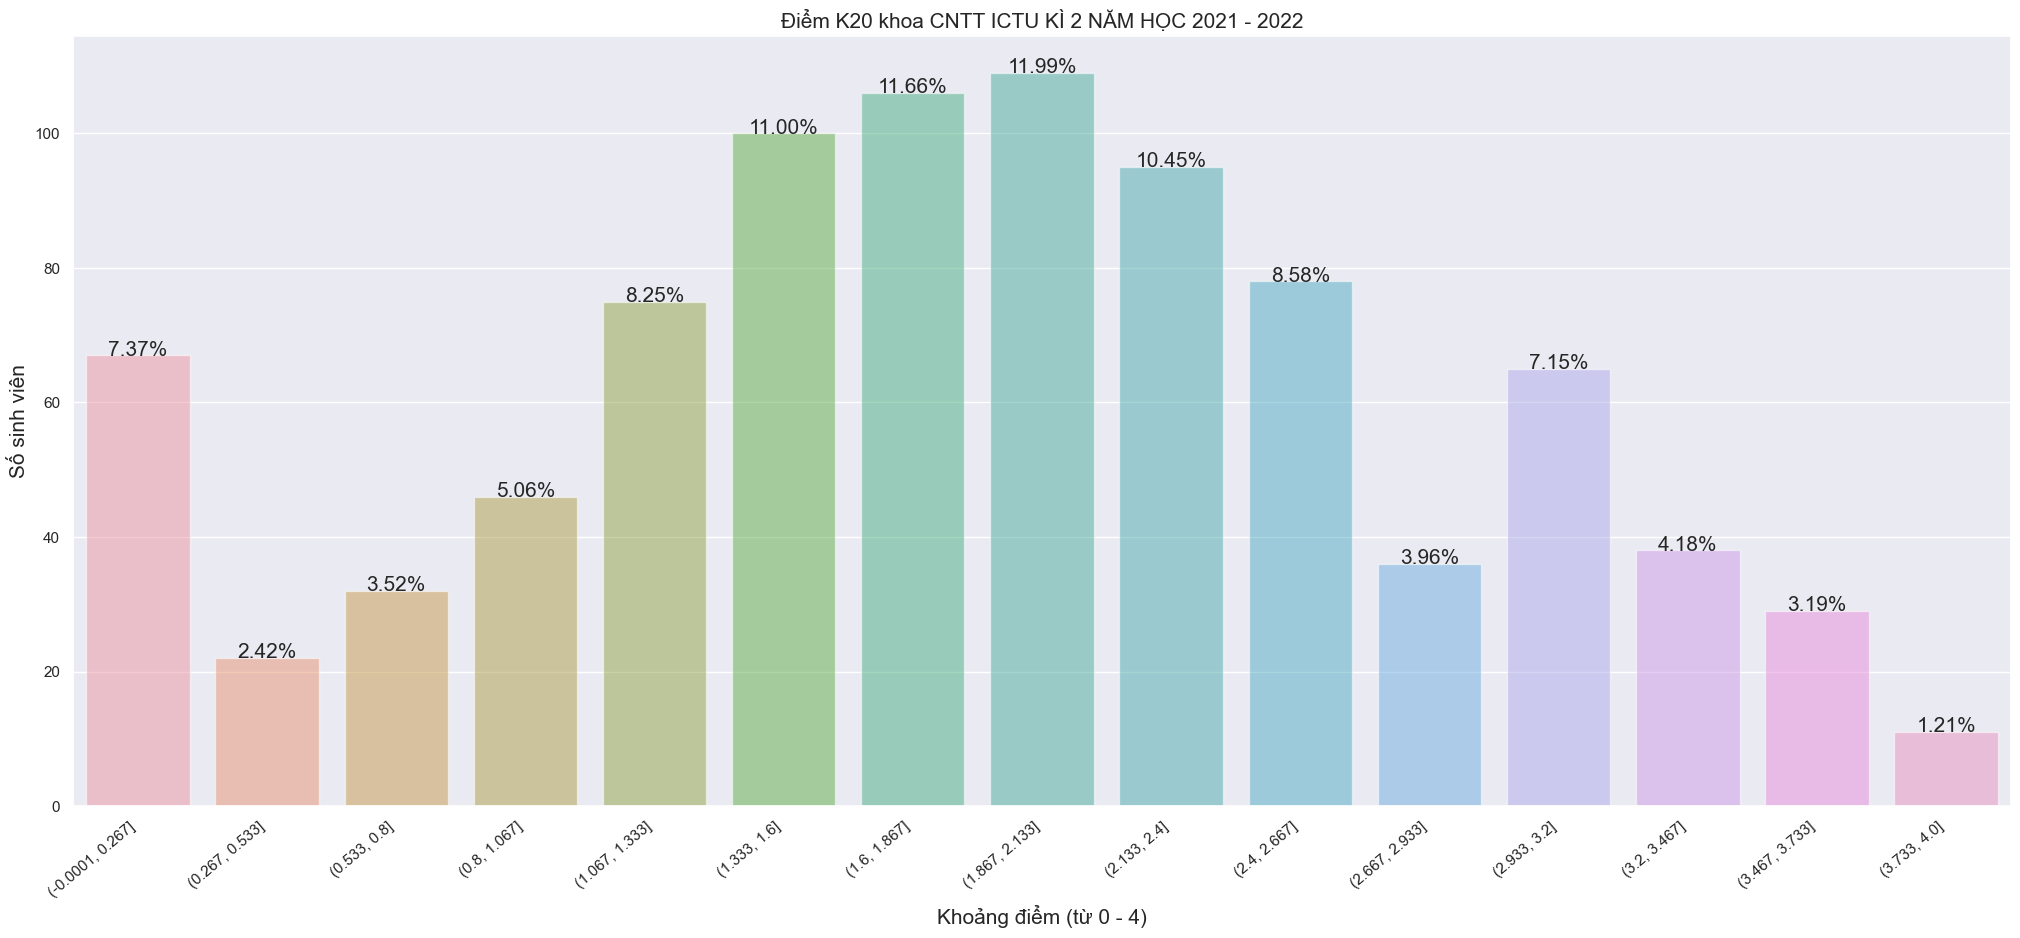

In [5]:
figure(figsize = (25,10))
plt.title("Điểm K20 khoa CNTT ICTU KÌ 2 NĂM HỌC 2021 - 2022", size = 15)
ax = sns.countplot(x = "binned", data = K18Mark4, alpha = 0.5)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 40, ha = "right")
plt.xlabel("Khoảng điểm (từ 0 - 4)", size = 15)
plt.ylabel("Số sinh viên", size = 15)

for p in ax.patches:
    percentage = '{:.2f}%'.format(100 * p.get_height() / len(K18Mark4))
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x,y), ha = "center", size = 15)
    
plt.savefig("File ảnh điểm K20\\Điểm K20 toàn khoa CNTT ICTU KÌ 2 NĂM HỌC 2021 - 2022.jpg")

In [7]:
nbins = 15
arrDiem = np.array(K18Mark4['Điểm hệ 4'])
bins = np.linspace(2.49999, arrDiem.max(), nbins -3)
print(f"Number of interval {nbins} bins is calculated:")
display(bins)
K18Mark4["binned"] = pd.cut(arrDiem, bins)
K18Mark4 = K18Mark4.dropna()
display(K18Mark4.head())
print(K18Mark4['binned'].value_counts())

Number of interval 15 bins is calculated:


array([2.49999   , 2.63635455, 2.77271909, 2.90908364, 3.04544818,
       3.18181273, 3.31817727, 3.45454182, 3.59090636, 3.72727091,
       3.86363545, 4.        ])

,Mã SV,Họ,Tên,Lớp,Điểm hệ 4,binned
0,DTC2154802010025,Nguyễn Hải,Anh,CNTT K20 CLC,2.65,"(2.636, 2.773]"
1,DTC2154802014003,Nguyễn Văn,Bắc,CNTT K20 CLC,3.00,"(2.909, 3.045]"
2,DTC21H4802014017,Đỗ Tất,Công,CNTT K20 CLC,3.82,"(3.727, 3.864]"
3,DTC21H4802014002,Triệu Văn,Cương,CNTT K20 CLC,2.94,"(2.909, 3.045]"
4,DTC21H4802014006,Nguyễn Đức Thái,Dương,CNTT K20 CLC,2.50,"(2.5, 2.636]"


(2.636, 2.773]    35
(2.909, 3.045]    34
(3.045, 3.182]    31
(2.773, 2.909]    28
(3.318, 3.455]    25
(2.5, 2.636]      22
(3.455, 3.591]    17
(3.182, 3.318]    13
(3.591, 3.727]    12
(3.727, 3.864]     9
(3.864, 4.0]       2
Name: binned, dtype: int64


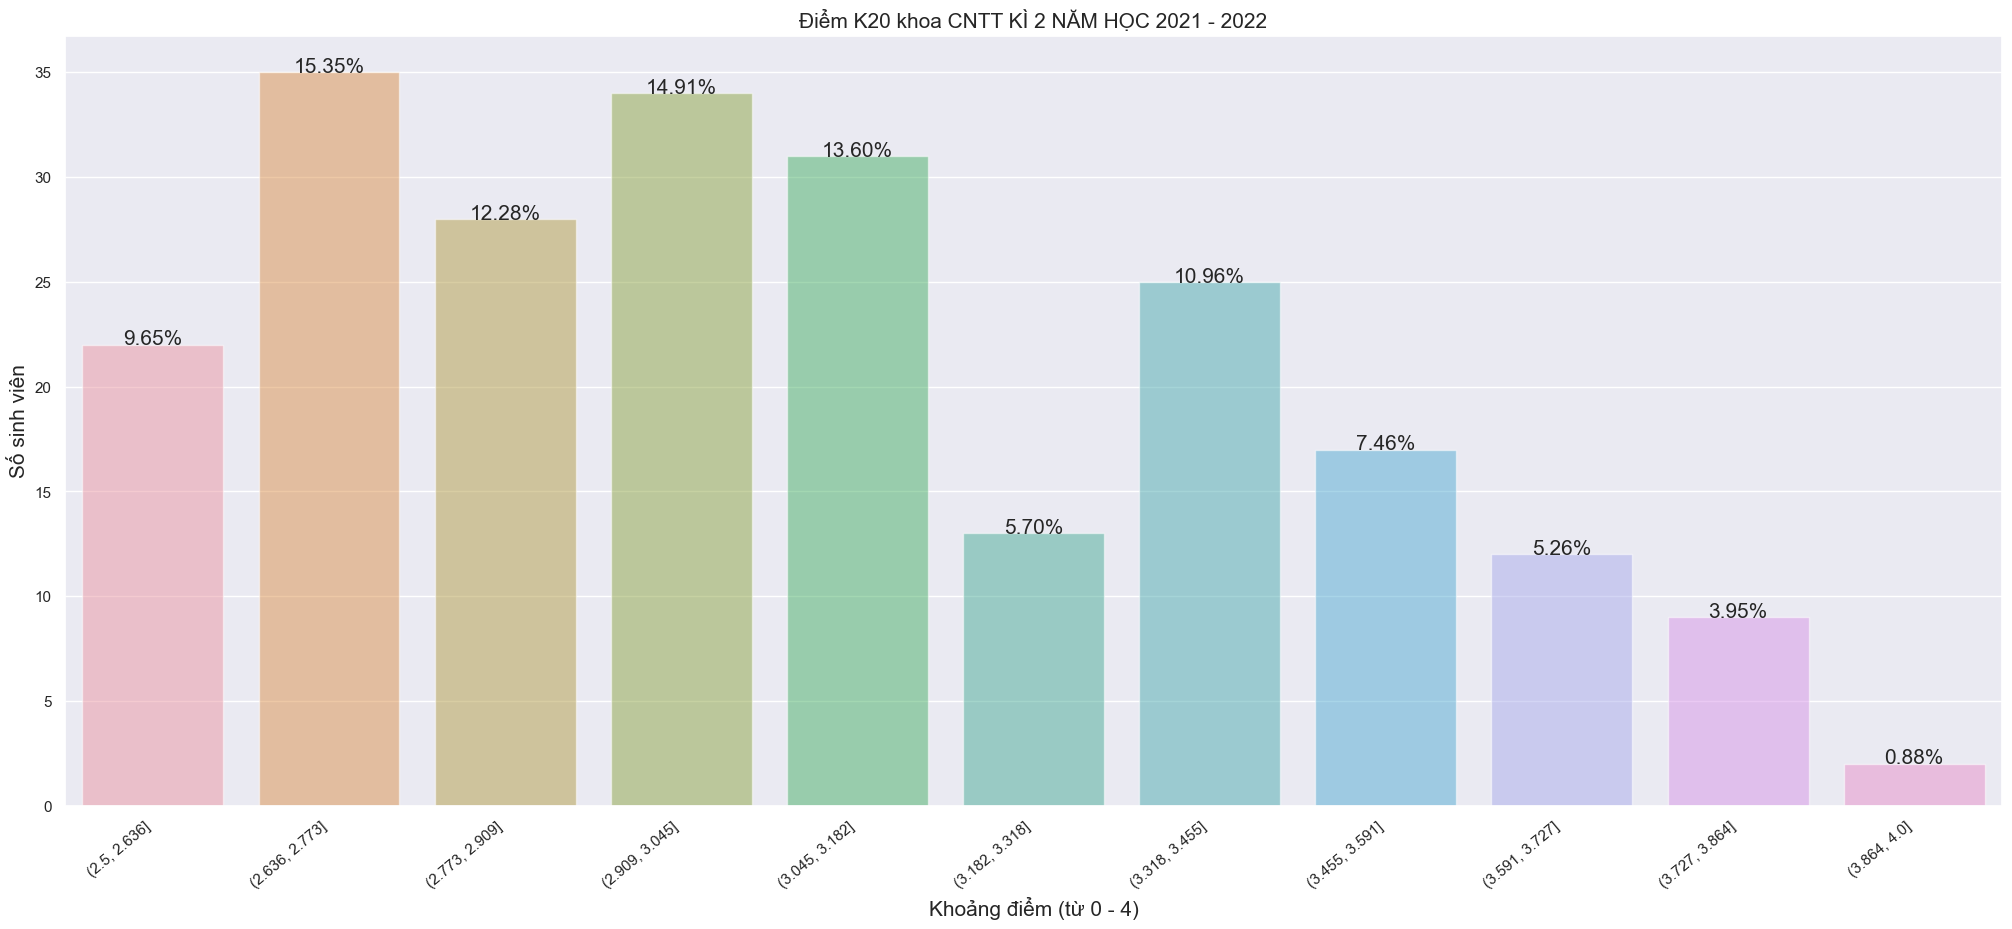

In [14]:
figure(figsize = (25,10))
plt.title("Điểm K20 khoa CNTT KÌ 2 NĂM HỌC 2021 - 2022", size = 15)
ax = sns.countplot(x = "binned", data = K18Mark4, alpha = 0.5)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 40, ha = "right")
plt.xlabel("Khoảng điểm (từ 0 - 4)", size = 15)
plt.ylabel("Số sinh viên", size = 15)

for p in ax.patches:
    percentage = '{:.2f}%'.format(100 * p.get_height() / len(K18Mark4[K18Mark4['Điểm hệ 4'] >= 2.5]))
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x,y), ha = "center", size = 15)

plt.savefig("File ảnh điểm K20\\Điểm K20 lón hơn 2.5 khoa CNTT ICTU KÌ 2 NĂM HỌC 2021 - 2022.jpg")

In [22]:
K18CNTTMark4 = pd.read_excel("K20Mark.xlsx",na_values = ":", usecols = ["Mã SV","Họ","Tên","Lớp","Điểm hệ 4"], sheet_name = 'Ngành CNTT')
display(K18CNTTMark4.head())
print("Shape:",K18CNTTMark4.shape)
print(f"Min Điểm hệ 4: {K18CNTTMark4['Điểm hệ 4'].min()}, max điểm hệ 4: {K18CNTTMark4['Điểm hệ 4'].max()}")
print(f"Number of unique Lớp: {list(K18CNTTMark4['Lớp'].unique())}")
print("***FREQUENCY***")
print(f"<<<Count of Lớp>>> \n{K18CNTTMark4['Lớp'].value_counts()}")
print(f"<<<Count of Điểm>>> \n{K18CNTTMark4['Điểm hệ 4'].value_counts()}")

,Mã SV,Họ,Tên,Lớp,Điểm hệ 4
0,DTC2154801031001,Đặng Hoàng,Anh,KTPM K20 KNU,2.85
1,DTC21H480103KNU0001,Phan Thị Vân,Anh,KTPM K20 KNU,2.10
2,DTC21H4801031008,Nguyễn Xuân,Bắc,KTPM K20 KNU,0.00
3,DTC2154802014007,Trần Khánh,Duy,KTPM K20 KNU,2.50
4,DTC21H4801031011,Đinh Trọng,Giáp,KTPM K20 KNU,1.90


Shape: (233, 5)
Min Điểm hệ 4: 0.0, max điểm hệ 4: 4.0
Number of unique Lớp: ['KTPM K20 KNU', 'KTPM K20A', 'KTPM K20B', 'KTPM K20C', 'KTPM K20D', 'KTPM K20E']
***FREQUENCY***
<<<Count of Lớp>>> 
KTPM K20A       45
KTPM K20B       44
KTPM K20D       44
KTPM K20C       43
KTPM K20E       40
KTPM K20 KNU    17
Name: Lớp, dtype: int64
<<<Count of Điểm>>> 
0.00    22
1.76    13
2.29    13
2.12    12
3.00    10
        ..
2.80     1
2.76     1
4.00     1
1.71     1
1.07     1
Name: Điểm hệ 4, Length: 75, dtype: int64


In [23]:
nbins = 15
arrDiem = np.array(K18CNTTMark4['Điểm hệ 4'])
bins = np.linspace(2.49999, arrDiem.max(), 10)
print(f"Number of interval {nbins} bins is calculated:")
display(bins)
K18CNTTMark4["binned"] = pd.cut(arrDiem, bins)
display(K18CNTTMark4.head())
print(K18CNTTMark4["binned"].value_counts())

Number of interval 15 bins is calculated:


array([2.49999   , 2.66665778, 2.83332556, 2.99999333, 3.16666111,
       3.33332889, 3.49999667, 3.66666444, 3.83333222, 4.        ])

,Mã SV,Họ,Tên,Lớp,Điểm hệ 4,binned
0,DTC2154801031001,Đặng Hoàng,Anh,KTPM K20 KNU,2.85,"(2.833, 3.0]"
1,DTC21H480103KNU0001,Phan Thị Vân,Anh,KTPM K20 KNU,2.10,NaN
2,DTC21H4801031008,Nguyễn Xuân,Bắc,KTPM K20 KNU,0.00,NaN
3,DTC2154802014007,Trần Khánh,Duy,KTPM K20 KNU,2.50,"(2.5, 2.667]"
4,DTC21H4801031011,Đinh Trọng,Giáp,KTPM K20 KNU,1.90,NaN


(3.0, 3.167]      14
(3.333, 3.5]      11
(2.5, 2.667]      10
(2.667, 2.833]     9
(3.167, 3.333]     6
(2.833, 3.0]       4
(3.5, 3.667]       3
(3.667, 3.833]     3
(3.833, 4.0]       2
Name: binned, dtype: int64


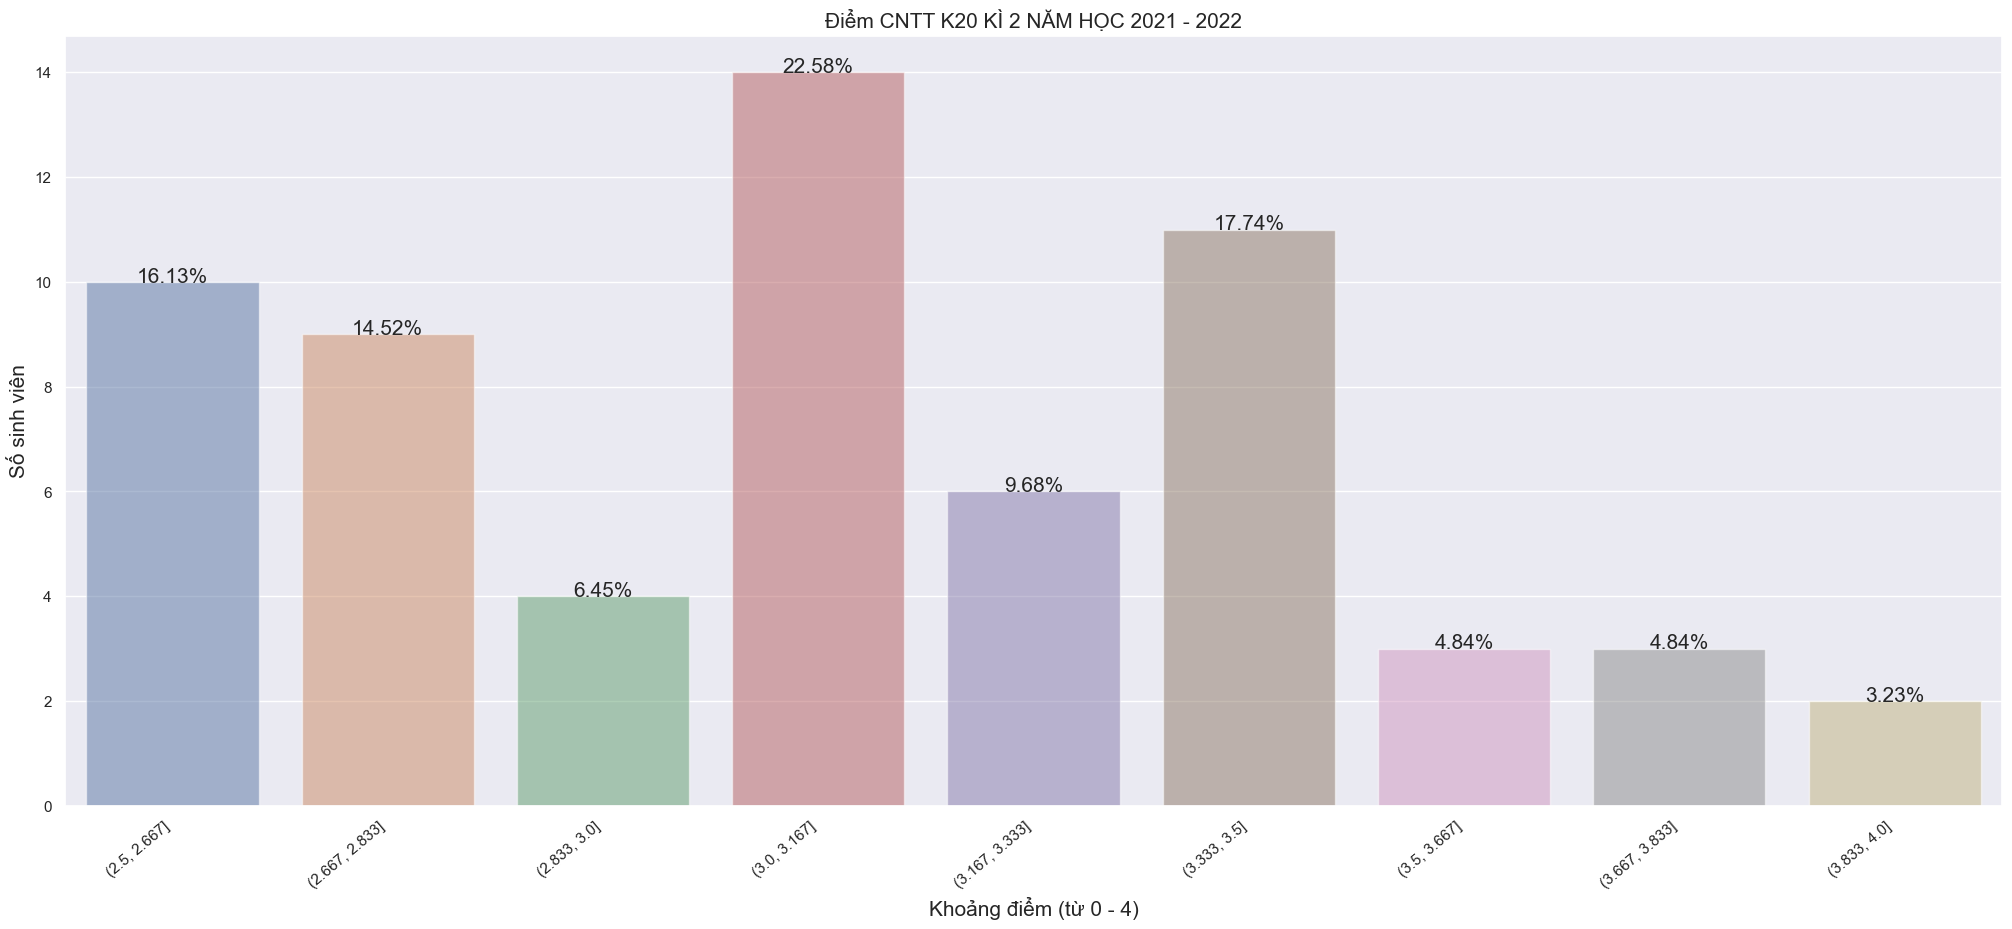

In [24]:
figure(figsize = (25,10))
plt.title("Điểm CNTT K20 KÌ 2 NĂM HỌC 2021 - 2022", size = 15)
ax = sns.countplot(x = "binned", data = K18CNTTMark4, alpha = 0.5)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 40, ha = "right")
plt.xlabel("Khoảng điểm (từ 0 - 4)", size = 15)
plt.ylabel("Số sinh viên", size = 15)

for p in ax.patches:
    percentage = '{:.2f}%'.format(100 * p.get_height() / len(K18CNTTMark4[K18CNTTMark4['Điểm hệ 4'] >= 2.5]))
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x,y), ha = "center", size = 15)
plt.savefig("File ảnh điểm K20\\Điểm riêng ngành khoa CNTT.jpg")